In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class KMeans:
    """
    K-Means Clustering from Scratch
    
    Key Concepts:
    - Unsupervised learning algorithm
    - Partitions data into K clusters
    - Iteratively updates cluster centroids
    - Uses Euclidean distance for assignments
    """
    
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels_ = None  # Fixed: changed from labels to labels_
        
    def fit(self, X):
        """
        Train the K-Means clustering model
        
        Parameters:
        X: feature matrix (n_samples, n_features)
        """
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly from data points
        random_idxs = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_idxs]
        
        for _ in range(self.max_iters):
            # Assign each point to nearest centroid
            labels = self._assign_clusters(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break
                
            self.centroids = new_centroids
            
        self.labels_ = self._assign_clusters(X)  # Fixed: store as attribute
        return self
    
    def _assign_clusters(self, X):
        """
        Assign each data point to the nearest centroid
        """
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)
    
    def _compute_distances(self, X):
        """
        Compute distances from each point to each centroid
        """
        distances = np.zeros((X.shape[0], self.k))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances
    
    def _update_centroids(self, X, labels):
        """
        Update centroids to be the mean of assigned points
        """
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            if np.sum(labels == i) > 0:
                new_centroids[i] = X[labels == i].mean(axis=0)
            else:
                # Handle empty clusters by reinitializing
                new_centroids[i] = X[np.random.randint(0, X.shape[0])]
        return new_centroids
    
    def predict(self, X):
        """
        Predict cluster labels for new data
        """
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

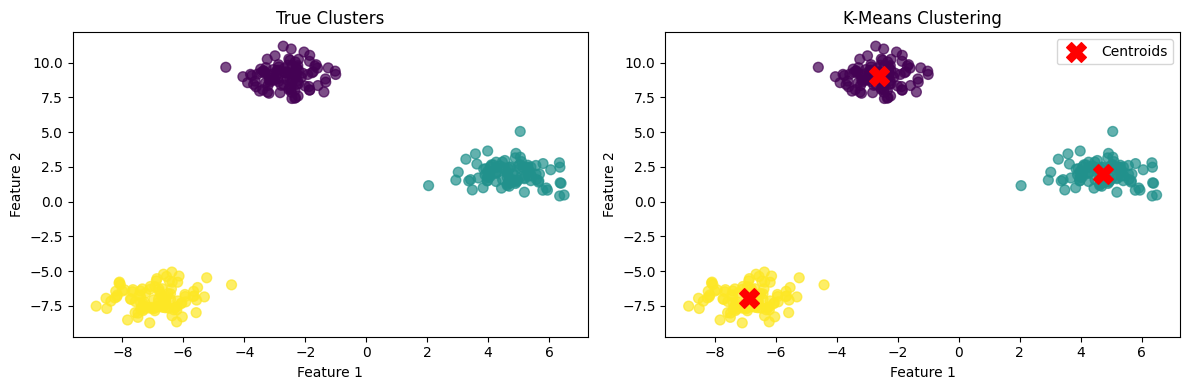

K-Means Clustering Results:
Number of clusters: 3
Centroid positions:
[[-2.60842567  9.03771305]
 [ 4.72565847  2.00310936]
 [-6.88302287 -6.96320924]]
Within-cluster sum of squares: 362.79


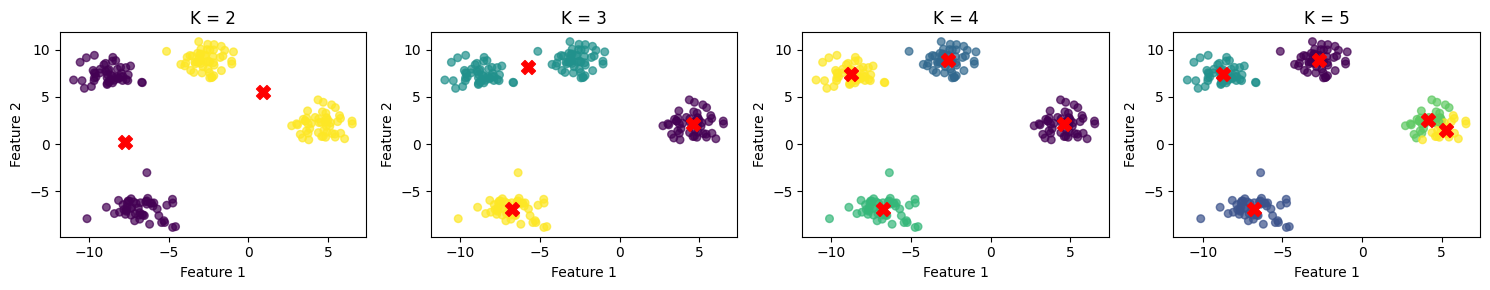

In [14]:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    
    # Create sample clustered data
    X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, 
                           random_state=42, cluster_std=0.8)
    
    # Create and train K-Means
    kmeans = KMeans(k=3)
    kmeans.fit(X)
    labels = kmeans.labels_  # Fixed: use labels_ instead of labels
    
    # Visualize results
    plt.figure(figsize=(12, 4))
    
    # Plot true clusters
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
    plt.title('True Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Plot K-Means clusters
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
                c='red', marker='X', s=200, label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Show cluster statistics
    print("K-Means Clustering Results:")
    print(f"Number of clusters: {kmeans.k}")
    print(f"Centroid positions:\n{kmeans.centroids}")
    
    # Calculate within-cluster sum of squares
    def wcss(X, labels, centroids):
        total = 0
        for i in range(len(centroids)):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                total += np.sum((cluster_points - centroids[i])**2)
        return total
    
    inertia = wcss(X, labels, kmeans.centroids)
    print(f"Within-cluster sum of squares: {inertia:.2f}")

def test_different_k():
    """Test K-Means with different numbers of clusters"""
    X, _ = make_blobs(n_samples=200, centers=4, n_features=2, random_state=42)
    
    plt.figure(figsize=(15, 3))
    
    for i, k in enumerate([2, 3, 4, 5]):
        kmeans = KMeans(k=k)
        kmeans.fit(X)
        labels = kmeans.labels_  # Fixed: use labels_
        
        plt.subplot(1, 4, i+1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.7)
        plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
                   c='red', marker='X', s=100)
        plt.title(f'K = {k}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

# Run additional test
test_different_k()